In [ ]:
#author = 'Mehul Bafna'import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

In [2]:
#Loading the data
df = pd.read_csv('IPL Matches 2008-2020.csv')
df1 = pd.read_csv('IPL Ball-by-Ball 2008-2020.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

In [4]:
#Filling missing values appropriately
df['player_of_match'].fillna('Match abandoned',inplace=True)
df['winner'].fillna('Match abandoned',inplace=True)
df['result_margin'][df['result']=='tie'].fillna('Match tied',inplace=True)
df['result_margin'].fillna('No result',inplace=True)
df['result'].fillna('Match abandoned',inplace=True)
df['eliminator'].fillna('Match abandoned',inplace=True)
df['method'].fillna('N',inplace=True)
df.loc[df['method']=='D/L','method']='Y'
df.loc[df['venue']=='Sharjah Cricket Stadium','city']='Sharjah'
df.loc[df['venue']=='Dubai International Cricket Stadium','city']='Dubai'
df.loc[df['venue']=='M.Chinnaswamy Stadium','venue']='M Chinnaswamy Stadium'
df.loc[df['team1']=='Rising Pune Supergiant','team1']='Rising Pune Supergiants'
df.loc[df['team2']=='Rising Pune Supergiant','team2']='Rising Pune Supergiants'
df.loc[df['toss_winner']=='Rising Pune Supergiant','toss_winner']='Rising Pune Supergiants'
df.loc[df['winner']=='Rising Pune Supergiant','winner']='Rising Pune Supergiants'
count = 1
for i in list(df['id'].unique()):
    df['id'].replace(i,count,inplace=True)
    count+=1

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               816 non-null    int64 
 1   city             816 non-null    object
 2   date             816 non-null    object
 3   player_of_match  816 non-null    object
 4   venue            816 non-null    object
 5   neutral_venue    816 non-null    int64 
 6   team1            816 non-null    object
 7   team2            816 non-null    object
 8   toss_winner      816 non-null    object
 9   toss_decision    816 non-null    object
 10  winner           816 non-null    object
 11  result           816 non-null    object
 12  result_margin    816 non-null    object
 13  eliminator       816 non-null    object
 14  method           816 non-null    object
 15  umpire1          816 non-null    object
 16  umpire2          816 non-null    object
dtypes: int64(2), object(15)
memory usag

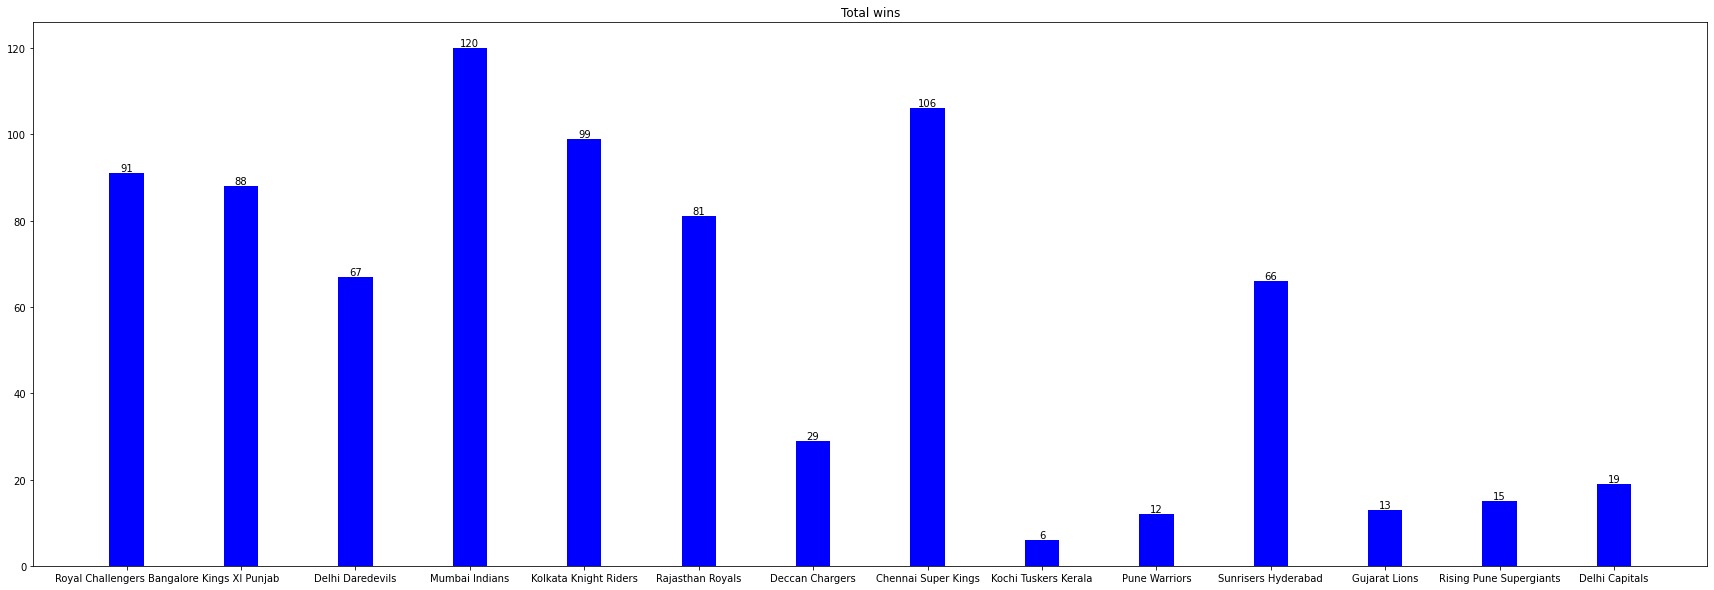

+---------------------+-----------------------------+------+--------+
|   Win/Loss Ratio    |            Team             | Wins | Losses |
+---------------------+-----------------------------+------+--------+
| 1.4722222222222223  |     Chennai Super Kings     | 106  |   72   |
| 1.4457831325301205  |       Mumbai Indians        | 120  |   83   |
| 1.3571428571428572  |       Delhi Capitals        |  19  |   14   |
| 1.1379310344827587  |     Sunrisers Hyderabad     |  66  |   58   |
|  1.064516129032258  |    Kolkata Knight Riders    |  99  |   93   |
| 1.0384615384615385  |      Rajasthan Royals       |  81  |   78   |
|         1.0         |   Rising Pune Supergiants   |  15  |   15   |
|        0.875        | Royal Challengers Bangalore |  91  |  104   |
| 0.8627450980392157  |       Kings XI Punjab       |  88  |  102   |
| 0.7647058823529411  |        Gujarat Lions        |  13  |   17   |
|        0.75         |    Kochi Tuskers Kerala     |  6   |   8    |
| 0.7204301075268817

In [6]:
#Win-loss ratio for each team
WON = []
LOST = []
TEAM = []
for i in list(df['team1'].unique()):
    WON.append(df['winner'][(df['winner']==i)].count())
    LOST.append(df['team1'][(df['winner']!=i) & (df['team1']==i) ].count()+df['team2'][(df['winner']!=i) & (df['team2']==i) & (df['result']!='Match abandoned')].count())
    TEAM.append(i)
fig = plt.figure(figsize = (30, 10))
# creating the bar plot
BARS = plt.bar(TEAM, WON, color ='blue',width = 0.3)
for BAR in BARS:
    plt.text(BAR.get_x() + BAR.get_width() / 2.0, BAR.get_height(), f'{BAR.get_height():.0f}', ha='center', va='bottom')


plt.title('Total wins')
plt.show()
TABLE = []
for i in range(0,len(WON)):
    TABLE.append((WON[i]/LOST[i],TEAM[i],WON[i],LOST[i]))
    
TABLE.sort(reverse=True)
TABLE.insert(0,('Win/Loss Ratio','Team','Wins','Losses'))
print(tabulate(TABLE,headers="firstrow",tablefmt="pretty"))

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193468 entries, 0 to 193467
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                193468 non-null  int64 
 1   inning            193468 non-null  int64 
 2   over              193468 non-null  int64 
 3   ball              193468 non-null  int64 
 4   batsman           193468 non-null  object
 5   non_striker       193468 non-null  object
 6   bowler            193468 non-null  object
 7   batsman_runs      193468 non-null  int64 
 8   extra_runs        193468 non-null  int64 
 9   total_runs        193468 non-null  int64 
 10  non_boundary      193468 non-null  int64 
 11  is_wicket         193468 non-null  int64 
 12  dismissal_kind    9495 non-null    object
 13  player_dismissed  9495 non-null    object
 14  fielder           6784 non-null    object
 15  extras_type       10233 non-null   object
 16  batting_team      193468 non-null  obj

In [8]:
#Adding the year column
df1['Year']=np.nan
df1['Year'][0:13489][pd.isna(df1['Year'])==True]=2008
df1['Year'][13489:27084][pd.isna(df1['Year'])==True]=2009
df1['Year'][27084:41573][pd.isna(df1['Year'])==True]=2010
df1['Year'][41573:58586][pd.isna(df1['Year'])==True]=2011
df1['Year'][58586:76353][pd.isna(df1['Year'])==True]=2012
df1['Year'][76353:94505][pd.isna(df1['Year'])==True]=2013
df1['Year'][94505:108793][pd.isna(df1['Year'])==True]=2014
df1['Year'][108793:122434][pd.isna(df1['Year'])==True]=2015
df1['Year'][122434:136530][pd.isna(df1['Year'])==True]=2016
df1['Year'][136530:150379][pd.isna(df1['Year'])==True]=2017
df1['Year'][150379:164665][pd.isna(df1['Year'])==True]=2018
df1['Year'][164665:178958][pd.isna(df1['Year'])==True]=2019
df1['Year'][178958:193468][pd.isna(df1['Year'])==True]=2020

In [9]:
#Filling the missing values appropriately in fielder, player_dismissed, dismissal_kind and extras_type column
df1.loc[pd.isna(df1['player_dismissed'])==True,'fielder']='Not dismissed'
df1.loc[pd.isna(df1['player_dismissed'])==True,'player_dismissed']='Not dismissed'
df1.loc[pd.isna(df1['dismissal_kind'])==True,'dismissal_kind']='Not dismissed'	
df1.loc[pd.isna(df1['fielder'])==True,'fielder']='OMD'
df1.loc[(pd.isna(df1['extras_type'])==True),'extras_type']='No extras'
for i in range(len(df1)):
    if df1.iloc[i]['dismissal_kind']=='caught and bowled':
        df1['fielder'].replace({df1.iloc[i]['fielder'],df1.iloc[i]['bowler']}, inplace=True)

In [10]:
#For filling the misisng values of the bowling_team
df1['Year'][pd.isna(df1['bowling_team'])==True].unique()

array([2011., 2015.])

In [11]:
#For filling the misisng values of the bowling_team
for i in list(df1['Year'][pd.isna(df1['bowling_team'])==True].unique()):
    if int(i)==2011:
        df1['bowling_team'].fillna('Pune Warriors',inplace=True)
    else:
        df1['bowling_team'].fillna('Rajasthan Royals',inplace=True)

In [12]:
#Renaming the id column with match no and then replacing the entries with match nummber.
df1.rename(columns = {'id':'MatchNo'}, inplace = True)
match_no = 1
for i in list(df1['MatchNo'].unique()):
    df1['MatchNo'].replace({i:match_no}, inplace=True)
    match_no+=1

In [13]:
#Correcting the error in team(franchise) naming
df1.loc[df1['batting_team']=='Rising Pune Supergiant','batting_team']='Rising Pune Supergiants'
df1.loc[df1['bowling_team']=='Rising Pune Supergiant','bowling_team']='Rising Pune Supergiants'

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193468 entries, 0 to 193467
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   MatchNo           193468 non-null  int64  
 1   inning            193468 non-null  int64  
 2   over              193468 non-null  int64  
 3   ball              193468 non-null  int64  
 4   batsman           193468 non-null  object 
 5   non_striker       193468 non-null  object 
 6   bowler            193468 non-null  object 
 7   batsman_runs      193468 non-null  int64  
 8   extra_runs        193468 non-null  int64  
 9   total_runs        193468 non-null  int64  
 10  non_boundary      193468 non-null  int64  
 11  is_wicket         193468 non-null  int64  
 12  dismissal_kind    193468 non-null  object 
 13  player_dismissed  193468 non-null  object 
 14  fielder           193468 non-null  object 
 15  extras_type       193468 non-null  object 
 16  batting_team      19

In [15]:
#Grouping the data as per each year
df2 = df1.groupby(df1.Year)

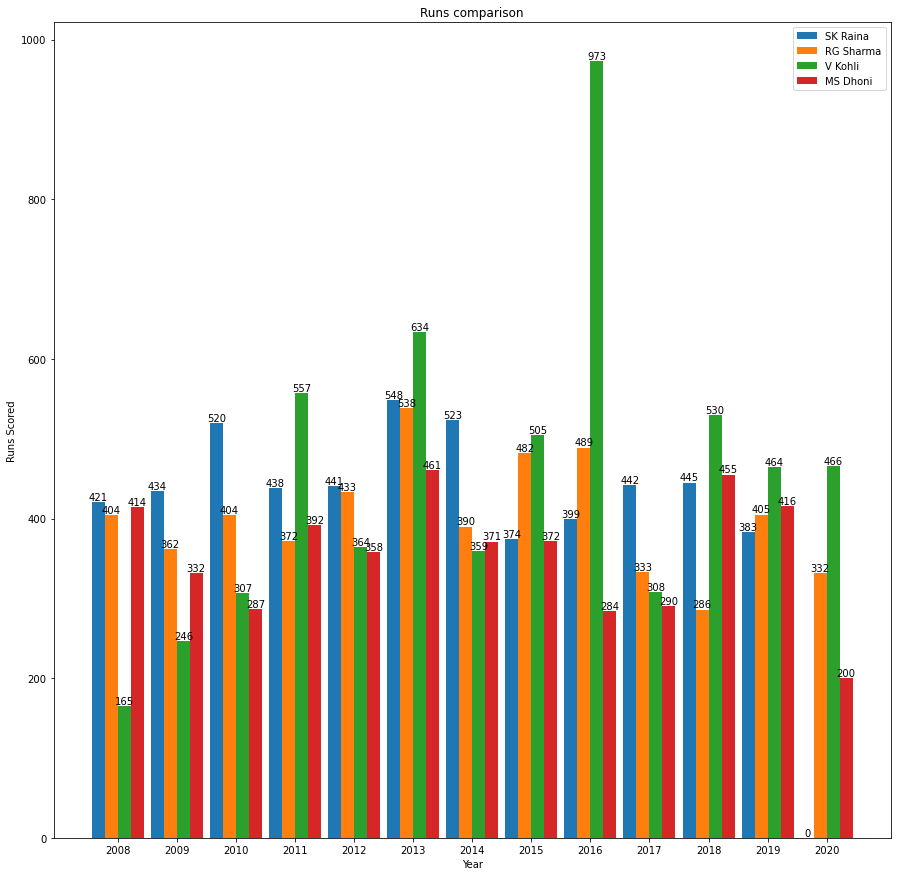

In [16]:
#Comparision of runs scored by Suresh Raina, Rohit Sharma, Virat Kohli and Mahendra Singh Dhoni each year
RAINA = []
SHARMA = []
KOHLI = []
DHONI = []
YEAR = []
for i in list(df1['Year'].unique()):
    df3 = df2.get_group(int(i))[df2.get_group(int(i))['batsman']=='SK Raina']
    df4 = df2.get_group(int(i))[df2.get_group(int(i))['batsman']=='RG Sharma']
    df5 = df2.get_group(int(i))[df2.get_group(int(i))['batsman']=='V Kohli']
    df6 = df2.get_group(int(i))[df2.get_group(int(i))['batsman']=='MS Dhoni']
    RAINA.append(int(df3['batsman_runs'].sum()))
    SHARMA.append(int(df4['batsman_runs'].sum()))
    KOHLI.append(int(df5['batsman_runs'].sum()))
    DHONI.append(int(df6['batsman_runs'].sum()))
    YEAR.append(int(i))
index = np.arange(13)
bar_width = 0.22
fig, ax = plt.subplots(figsize=(15,15))
SR = ax.bar(index, RAINA, bar_width,label="SK Raina")
RGS = ax.bar(index+bar_width, SHARMA,bar_width, label="RG Sharma")
VK = ax.bar(index+2*bar_width, KOHLI,bar_width, label="V Kohli")
MSD = ax.bar(index+3*bar_width, DHONI,bar_width, label="MS Dhoni")
for BAR in SR+RGS+VK+MSD:
    plt.text(BAR.get_x() + BAR.get_width() / 2.0, BAR.get_height(), f'{BAR.get_height():.0f}', ha='center', va='bottom')
ax.set_xlabel('Year')
ax.set_ylabel('Runs Scored')
ax.set_title('Runs comparison')
ax.set_xticks(index+1.5*bar_width)
ax.set_xticklabels(YEAR)
ax.legend()
plt.show()

In [40]:
#Orange and purple cap holders for each year till 2020
def orange_and_purple_cap(data,year):
    O = []
    P = []
    data_y = data.groupby(data.Year)
    for j in list(data_y.get_group(int(year))['batsman'].unique()):
        Data_O = data_y.get_group(int(year))[data_y.get_group(int(year))['batsman']==j]
        O.append((int(Data_O['batsman_runs'].sum()),j))
    for j in list(data_y.get_group(int(year))['bowler'].unique()):
        Data_P = data_y.get_group(int(year))[data_y.get_group(int(year))['bowler']==j]
        P.append((int(Data_P[(Data_P['bowler']==j) & (Data_P['dismissal_kind']!='run out') & (Data_P['dismissal_kind']!='retired hurt') & (Data_P['dismissal_kind']!='obstructing the field')]\
        ['is_wicket'].sum()),j))
    O.sort()
    P.sort()
    return 'Orange cap: '+str(O[-1][-1]),'\nPurple cap: '+str(P[-1][-1])

data = df1
year = int(input('Year : '))
print(orange_and_purple_cap(data,year)[0],orange_and_purple_cap(data,year)[1])

years :2018
Orange cap: KS Williamson 
Purple cap: AJ Tye


In [18]:
#Most runs and wickets against a particular team
x = list(df1['batsman'].unique())
Most_runs = []
    
for i in list(df1['bowling_team'].unique()):
    O = []
    for j in x:
        O.append((int(df1[(df1['batsman']==j) & (df1['bowling_team']==i)]['batsman_runs'].sum()),j,i))
    O.sort()
    Most_runs.append(O[-1])
    
y = list(df1['bowler'].unique())
Most_wickets = [] 

for l in list(df1['batting_team'].unique()):    
    P = []
    for k in y:
        P.append((int(df1[(df1['bowler']==k) & (df1['batting_team']==l) & (df1['dismissal_kind']!='run out') & (df1['dismissal_kind']!='retired hurt')\
        & (df1['dismissal_kind']!='obstructing the field')]['is_wicket'].sum()),k,l))
    P.sort()
    Most_wickets.append(P[-1])

Most_runs.sort(reverse=True)
Most_wickets.sort(reverse=True)
Most_runs.insert(0,("Most runs","Batsman","Team"))
Most_wickets.insert(0,("Most wickets","Bowler","Team"))
print(tabulate(Most_runs, headers='firstrow',tablefmt="pretty"))

+-----------+--------------+-----------------------------+
| Most runs |   Batsman    |            Team             |
+-----------+--------------+-----------------------------+
|    939    |  RG Sharma   |    Kolkata Knight Riders    |
|    906    |  DA Warner   |       Kings XI Punjab       |
|    887    |   V Kohli    |     Chennai Super Kings     |
|    823    |   MS Dhoni   | Royal Challengers Bangalore |
|    818    |   SK Raina   |       Mumbai Indians        |
|    761    |   V Kohli    |      Delhi Daredevils       |
|    609    |   SK Raina   |      Rajasthan Royals       |
|    566    |  SR Watson   |     Sunrisers Hyderabad     |
|    393    |   CH Gayle   |        Pune Warriors        |
|    339    |   R Dravid   |       Deccan Chargers       |
|    336    |  DA Warner   |        Gujarat Lions        |
|    271    |   V Kohli    |   Rising Pune Supergiants   |
|    201    |  Q de Kock   |       Delhi Capitals        |
|    100    | SR Tendulkar |    Kochi Tuskers Kerala    

In [19]:
print(tabulate(Most_wickets, headers='firstrow',tablefmt="pretty"))

+--------------+----------------+-----------------------------+
| Most wickets |     Bowler     |            Team             |
+--------------+----------------+-----------------------------+
|      31      |   SL Malinga   |     Chennai Super Kings     |
|      30      |    A Mishra    |      Rajasthan Royals       |
|      29      |    UT Yadav    |       Kings XI Punjab       |
|      28      |    DJ Bravo    |       Mumbai Indians        |
|      27      |    B Kumar     |    Kolkata Knight Riders    |
|      23      | Sandeep Sharma | Royal Challengers Bangalore |
|      21      |   SL Malinga   |      Delhi Daredevils       |
|      19      |   SL Malinga   |       Deccan Chargers       |
|      19      |    DJ Bravo    |     Sunrisers Hyderabad     |
|      12      |   SL Malinga   |        Pune Warriors        |
|      12      |    B Kumar     |        Gujarat Lions        |
|      11      |  Rashid Khan   |       Delhi Capitals        |
|      7       |   JJ Bumrah    |   Risi

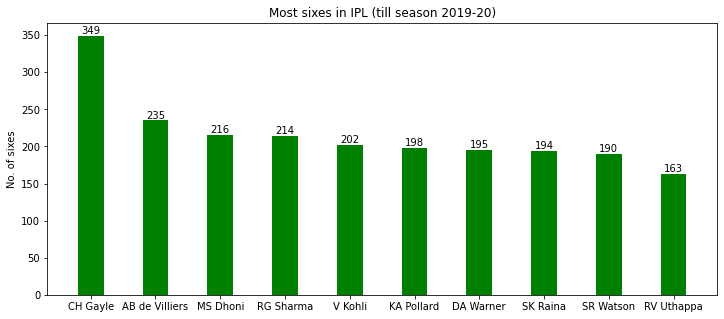

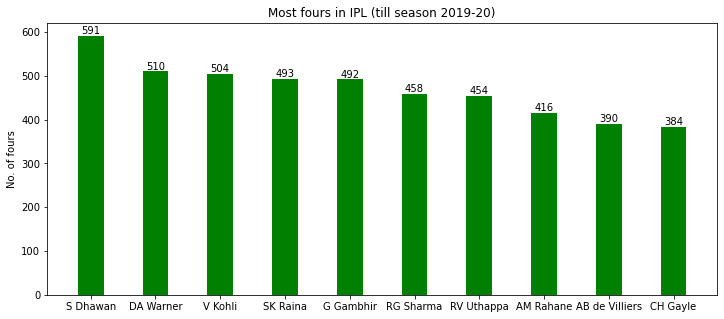

In [20]:
#Most sixes and fours in IPL (individual)
Most_sixes_with_batsman = []
for i in list(df1['batsman'].unique()):
    Most_sixes_with_batsman.append((int(df1[(df1['batsman']==i) & (df1['batsman_runs']==6)]['batsman_runs'].sum()/6),i)) 
Most_sixes_with_batsman.sort(reverse=True)
fig = plt.figure(figsize = (12, 5))
Most_sixes = []
Batsman = []
for i in Most_sixes_with_batsman:
    Most_sixes.append(i[0])
    Batsman.append(i[1])
    
# creating the bar plot
BARS = plt.bar(Batsman[0:10], Most_sixes[0:10], color ='green',
        width = 0.4)
for BAR in BARS:
    plt.text(BAR.get_x() + BAR.get_width() / 2.0, BAR.get_height(), f'{BAR.get_height():.0f}', ha='center', va='bottom')

plt.ylabel("No. of sixes")
plt.title("Most sixes in IPL (till season 2019-20)")
plt.show()

#Most fours in IPL
Most_fours_with_batsman = []
for i in list(df1['batsman'].unique()):
    Most_fours_with_batsman.append((int(df1[(df1['batsman']==i) & (df1['batsman_runs']==4)]['batsman_runs'].sum()/4),i)) 
Most_fours_with_batsman.sort(reverse=True)
# creating the bar plot
fig = plt.figure(figsize = (12, 5))
Most_fours = []
Batsman = []
for i in Most_fours_with_batsman:
    Most_fours.append(i[0])
    Batsman.append(i[1])
BARS = plt.bar(Batsman[0:10], Most_fours[0:10], color ='green',width = 0.4)
for BAR in BARS:
    plt.text(BAR.get_x() + BAR.get_width() / 2.0, BAR.get_height(), f'{BAR.get_height():.0f}', ha='center', va='bottom')
plt.ylabel("No. of fours")
plt.title("Most fours in IPL (till season 2019-20)")
plt.show()

In [21]:
#Best strike rate
Best_strike_rate = []
for j in x:
    Best_strike_rate.append((round((int(df1[(df1['batsman']==j) &  (int(df1[(df1['batsman']==j) ]['ball'].count()) >120)]['batsman_runs'].sum())/\
    int(df1[(df1['batsman']==j) ]['ball'].count()))*100,2),j))
Best_strike_rate.sort(reverse=True)

Best_strike_rate.insert(0,('Strike rate *','Batsman'))
print(tabulate(Best_strike_rate[0:11], headers='firstrow',tablefmt="pretty"))
print('* Minimum 120 balls faced')

+---------------+--------------+
| Strike rate * |   Batsman    |
+---------------+--------------+
|     172.0     |  AD Russell  |
|    163.01     | BCJ Cutting  |
|     161.3     |   N Pooran   |
|    155.67     |  SP Narine   |
|    155.28     |    MM Ali    |
|    153.06     |  CH Morris   |
|    152.34     |  JC Archer   |
|    150.81     | Bipul Sharma |
|    150.39     |  HH Pandya   |
|    148.83     |   V Sehwag   |
+---------------+--------------+
* Minimum 120 balls faced


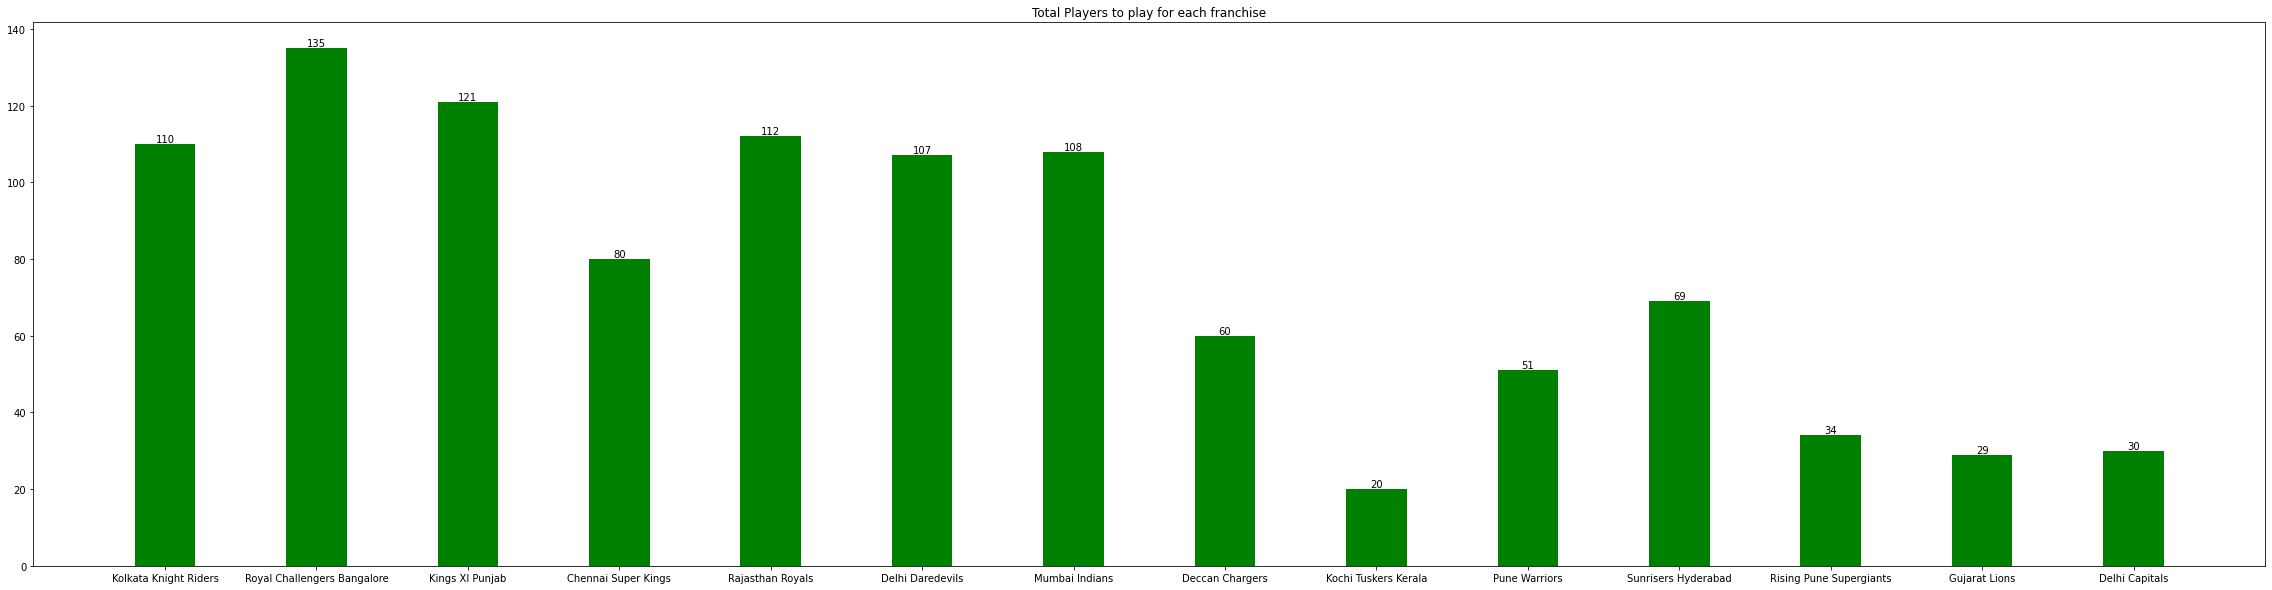

In [22]:
#Total players to play for each franchise
Players_with_team = []
for i in list(df1['batting_team'].unique()):
    Players_with_team.append((list(df1['batsman'][(df1['batting_team']==i)].unique())+list(df1['bowler'][(df1['bowling_team']==i)].unique()),i))

Unique_players_with_team = []
for i in Players_with_team:
    Players = []
    for j in i[0]:
        if j not in Players:
            Players.append(j)
    Unique_players_with_team.append((len(Players),i[1]))
fig = plt.figure(figsize = (40, 10))
Total_players = []
Team = []
for i in Unique_players_with_team:
    Total_players.append(i[0])
    Team.append(i[1])
BARS = plt.bar(Team, Total_players, color ='green',width = 0.4)
for BAR in BARS:
    plt.text(BAR.get_x() + BAR.get_width() / 2.0, BAR.get_height(), f'{BAR.get_height():.0f}', ha='center', va='bottom')
plt.title("Total Players to play for each franchise")
plt.show()

In [23]:
#Ratio of balls faced and boundaries scored(individual)
Balls_per_boundary = []
for i in list(df1['batsman'].unique()):
    x = int(df1[(df1['batsman']==i) & (df1['batsman_runs']==6)]['batsman_runs'].sum()/6)+int(df1[(df1['batsman']==i) & (df1['batsman_runs']==4)]['batsman_runs'].sum()/4)
    if int(df1[(df1['batsman']==i) & (df1['extras_type']!='wides') & (df1['extras_type']!='penalty')]['ball'].count()) > 150 and x!=0:
        Balls_per_boundary.append((round(int(df1[(df1['batsman']==i) & (df1['extras_type']!='wides') & (df1['extras_type']!='penalty')]['ball'].count())/x,2),i))
Balls_per_boundary.sort()
Balls_per_boundary.insert(0,('Balls per boundary *','Batsman'))
print(tabulate(Balls_per_boundary[0:15], headers='firstrow',tablefmt="github"))
print('* Minimum 150 balls faced')

|   Balls per boundary * | Batsman       |
|------------------------|---------------|
|                   3.5  | SP Narine     |
|                   3.56 | AD Russell    |
|                   3.8  | MJ Lumb       |
|                   3.99 | V Sehwag      |
|                   4.33 | ST Jayasuriya |
|                   4.34 | CH Gayle      |
|                   4.38 | N Pooran      |
|                   4.43 | MM Ali        |
|                   4.52 | AC Gilchrist  |
|                   4.63 | GJ Maxwell    |
|                   4.69 | PP Shaw       |
|                   4.7  | JC Buttler    |
|                   4.73 | HH Pandya     |
|                   4.76 | CA Lynn       |
* Minimum 150 balls faced


In [24]:
#Ratio of balls faced and wickets taken(individual)
Balls_per_wicket = []
for i in list(df1['bowler'].unique()):
    x = int(df1[(df1['bowler']==i) & (df1['dismissal_kind']!='run out') & (df1['dismissal_kind']!='retired hurt') & (df1['dismissal_kind']!='obstructing the field')]['is_wicket'].sum())
    if int(df1[(df1['bowler']==i) & (df1['extras_type']!='wides') & (df1['extras_type']!='noballs') & (df1['extras_type']!='penalty')]['ball'].count()) > 350 and x!=0:
        Balls_per_wicket.append((round(int(df1[(df1['bowler']==i) & (df1['extras_type']!='wides') & (df1['extras_type']!='noballs') & (df1['extras_type']!='penalty')]['ball'].count())/x,2),i))
Balls_per_wicket.sort()
Balls_per_wicket.insert(0,('Balls per wicket *','Bowler'))
print(tabulate(Balls_per_wicket[0:15], headers='firstrow',tablefmt="github"))
print('* Minimum 350 balls bowled')

|   Balls per wicket * | Bowler        |
|----------------------|---------------|
|                13.2  | K Rabada      |
|                14.11 | KK Ahmed      |
|                14.96 | CR Woakes     |
|                15.47 | AJ Tye        |
|                15.56 | MF Maharoof   |
|                15.57 | DE Bollinger  |
|                16.15 | Imran Tahir   |
|                16.63 | SL Malinga    |
|                16.64 | A Nortje      |
|                16.89 | A Singh       |
|                16.89 | S Aravind     |
|                16.91 | BW Hilfenhaus |
|                17.06 | MA Starc      |
|                17.45 | KK Cooper     |
* Minimum 350 balls bowled


In [25]:
#Most player of the match awards
df['player_of_match'].value_counts()[0:15]

AB de Villiers    23
CH Gayle          22
RG Sharma         18
DA Warner         17
MS Dhoni          17
YK Pathan         16
SR Watson         16
SK Raina          14
V Kohli           13
G Gambhir         13
AM Rahane         12
MEK Hussey        12
KA Pollard        11
A Mishra          11
V Sehwag          11
Name: player_of_match, dtype: int64

In [26]:
# Top 10 biggest margin wins with respect to runs
df[['result_margin','team1','team2','winner']][df['result']=='runs'].sort_values('result_margin',ascending=False)[0:10]

,result_margin,team1,team2,winner
620,146.0,Delhi Daredevils,Mumbai Indians,Mumbai Indians
560,144.0,Royal Challengers Bangalore,Gujarat Lions,Royal Challengers Bangalore
0,140.0,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders
497,138.0,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore
351,130.0,Royal Challengers Bangalore,Pune Warriors,Royal Challengers Bangalore
706,118.0,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad
236,111.0,Kings XI Punjab,Royal Challengers Bangalore,Kings XI Punjab
55,105.0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals
676,102.0,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians
123,98.0,Delhi Daredevils,Mumbai Indians,Mumbai Indians


In [27]:
#Top 10 narrowest margin wins with respect to runs
df[['result_margin','team1','team2','winner']][df['result']=='runs'].sort_values('result_margin',ascending=True)[0:10]

,result_margin,team1,team2,winner
635,1.0,Mumbai Indians,Rising Pune Supergiants,Mumbai Indians
755,1.0,Mumbai Indians,Chennai Super Kings,Mumbai Indians
459,1.0,Chennai Super Kings,Delhi Daredevils,Chennai Super Kings
539,1.0,Delhi Daredevils,Gujarat Lions,Gujarat Lions
734,1.0,Royal Challengers Bangalore,Chennai Super Kings,Royal Challengers Bangalore
104,1.0,Deccan Chargers,Kings XI Punjab,Kings XI Punjab
46,1.0,Mumbai Indians,Kings XI Punjab,Kings XI Punjab
285,1.0,Delhi Daredevils,Rajasthan Royals,Delhi Daredevils
555,1.0,Kings XI Punjab,Royal Challengers Bangalore,Royal Challengers Bangalore
291,1.0,Pune Warriors,Mumbai Indians,Mumbai Indians


In [28]:
# Top 10 biggest margin wins with respect to wickets
df[['result_margin','team1','team2','winner']][df['result']=='wickets'].sort_values('result_margin',ascending=False)[0:10]

,result_margin,team1,team2,winner
317,10.0,Rajasthan Royals,Mumbai Indians,Mumbai Indians
683,10.0,Kings XI Punjab,Royal Challengers Bangalore,Royal Challengers Bangalore
60,10.0,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils
531,10.0,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad
759,10.0,Mumbai Indians,Sunrisers Hyderabad,Sunrisers Hyderabad
331,10.0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings
12,10.0,Mumbai Indians,Deccan Chargers,Deccan Chargers
611,10.0,Kings XI Punjab,Delhi Daredevils,Kings XI Punjab
239,10.0,Mumbai Indians,Rajasthan Royals,Rajasthan Royals
124,10.0,Royal Challengers Bangalore,Rajasthan Royals,Royal Challengers Bangalore


In [29]:
# Top 10 narrowest wins with respect to wickets
df[['result_margin','team1','team2','winner']][df['result']=='wickets'].sort_values('result_margin',ascending=True)[0:10]

,result_margin,team1,team2,winner
500,1.0,Kolkata Knight Riders,Kings XI Punjab,Kolkata Knight Riders
636,1.0,Mumbai Indians,Chennai Super Kings,Chennai Super Kings
642,1.0,Sunrisers Hyderabad,Mumbai Indians,Sunrisers Hyderabad
536,2.0,Rising Pune Supergiants,Kolkata Knight Riders,Kolkata Knight Riders
99,2.0,Royal Challengers Bangalore,Chennai Super Kings,Royal Challengers Bangalore
692,2.0,Sunrisers Hyderabad,Chennai Super Kings,Chennai Super Kings
753,2.0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals
295,2.0,Mumbai Indians,Chennai Super Kings,Mumbai Indians
625,2.0,Gujarat Lions,Delhi Daredevils,Delhi Daredevils
57,3.0,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals


In [30]:
#Runrate in powerplay and death overs(17-20) for all participating teams each year
df1_y = df1.groupby(df1.Year)
Run_rate_powerplay_every_year = []
for i in list(df1['Year'].unique()):
    Run_rate = []
    df2 = pd.DataFrame()
    for j in list(df1['batting_team'].unique()):
        df2 = df1_y.get_group(int(i))[df1_y.get_group(int(i))['batting_team']==j]  
        x = int(df2[(df2['extras_type']!='wides') & (df2['extras_type']!='noballs') & (df2['extras_type']!='penalty') & (df2['over']<7)]['ball'].count())
        y = int(df2[(df2['extras_type']!='wides') & (df2['extras_type']!='noballs') & (df2['extras_type']!='penalty') & (df2['over']>16)]['ball'].count())
        if x!=0 and y!=0:
            Run_rate.append((round(6*(int(df2[(df2['over']<7)]['batsman_runs'].sum())+int(df2[(df2['over']<7)]['extra_runs'].sum()))/x,2),\
                             round(6*(int(df2[(df2['over']>16)]['batsman_runs'].sum())+int(df2[(df2['over']>16)]['extra_runs'].sum()))/y,2),j,int(i)))
    Run_rate_powerplay_every_year.append(Run_rate)
for i in Run_rate_powerplay_every_year:
    i.insert(0,('Run rate (Powerplay)','Run rate (death overs (17-20))','Team','Year'))
    print(tabulate(i,headers='firstrow',tablefmt='pretty'))

+----------------------+--------------------------------+-----------------------------+------+
| Run rate (Powerplay) | Run rate (death overs (17-20)) |            Team             | Year |
+----------------------+--------------------------------+-----------------------------+------+
|         6.64         |             11.68              |    Kolkata Knight Riders    | 2008 |
|         6.27         |              9.38              | Royal Challengers Bangalore | 2008 |
|         8.43         |             10.78              |       Kings XI Punjab       | 2008 |
|         7.57         |             11.41              |     Chennai Super Kings     | 2008 |
|         7.88         |              9.4               |      Rajasthan Royals       | 2008 |
|         8.58         |             10.11              |      Delhi Daredevils       | 2008 |
|         8.01         |              10.4              |       Mumbai Indians        | 2008 |
|         7.53         |             10.57        

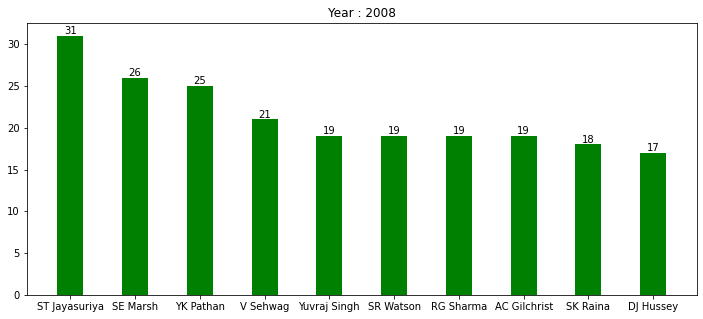

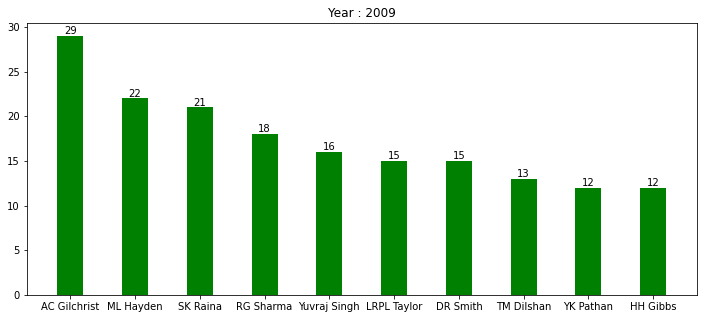

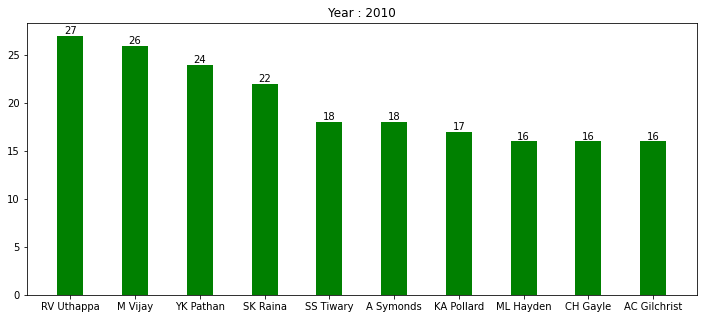

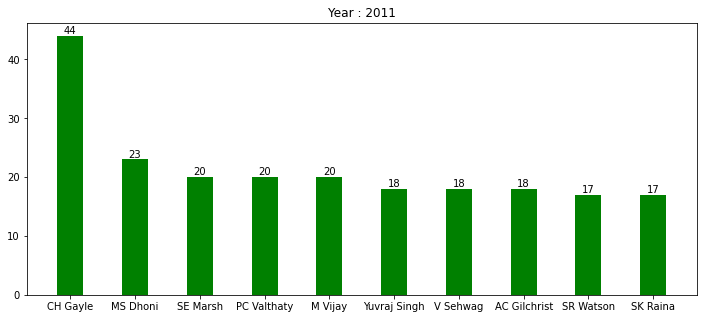

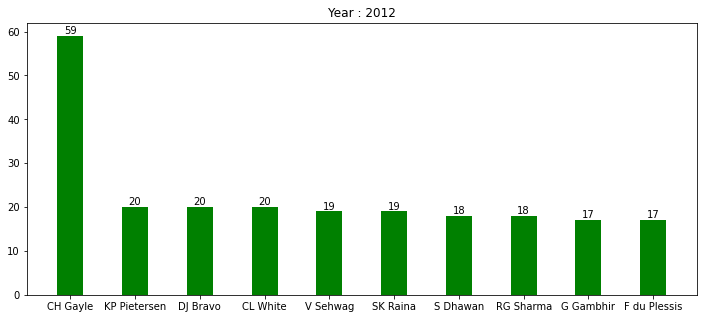

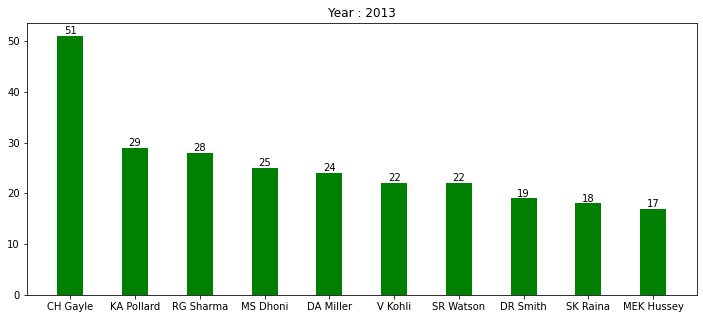

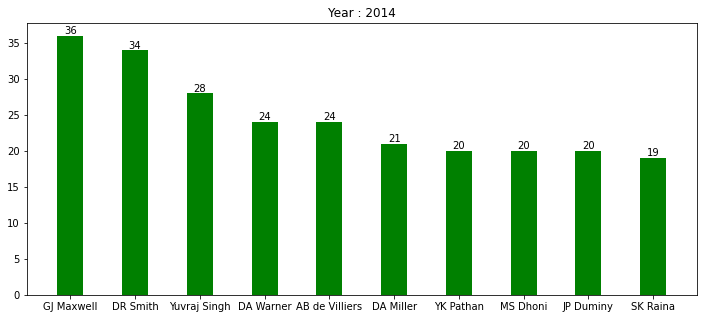

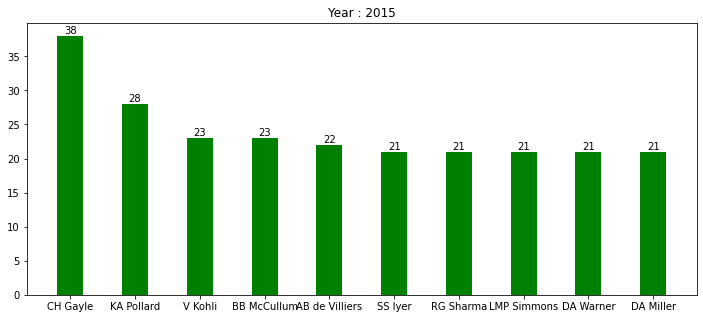

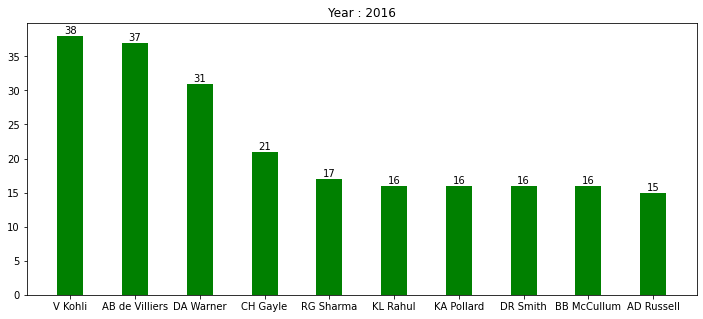

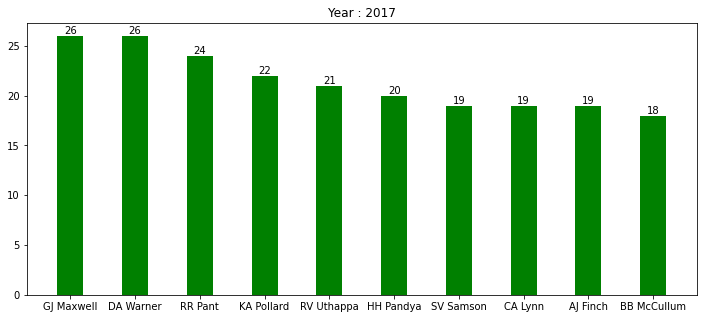

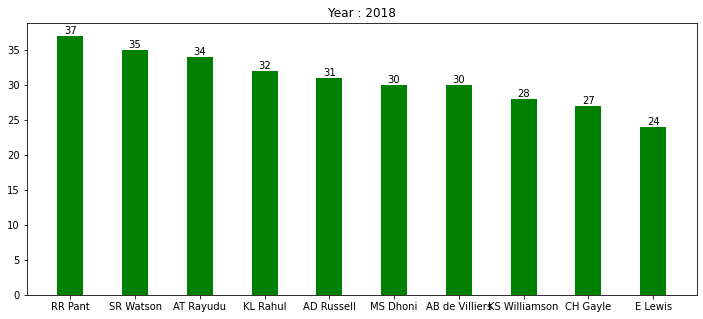

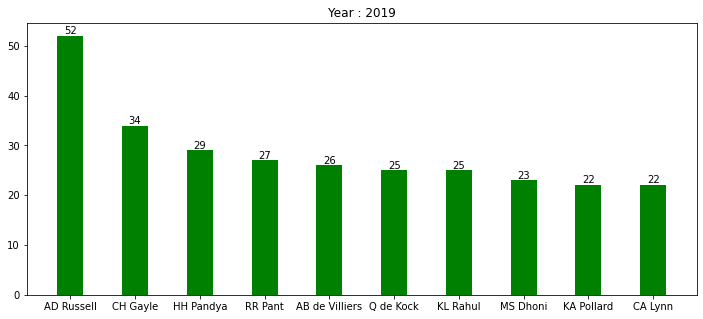

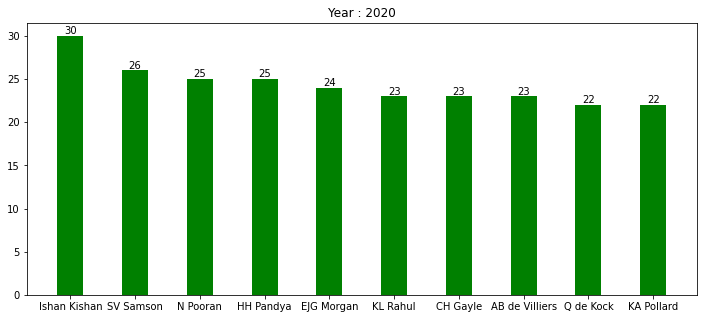

In [34]:
#Most sixes and fours in IPL (individual) on a yearly basis
for j in list(df1['Year'].unique()):
    df2 = df1_y.get_group(int(j))
    Most_sixes_with_batsman_year = []
    for i in list(df1['batsman'].unique()):
        Most_sixes_with_batsman_year.append((int(df2[(df2['batsman']==i) & (df2['batsman_runs']==6)]['batsman_runs'].sum()/6),i)) 
    Most_sixes_with_batsman_year.sort(reverse=True)
    fig = plt.figure(figsize = (12, 5))
    Most_sixes = []
    Batsman = []
    for i in Most_sixes_with_batsman_year:
        Most_sixes.append(i[0])
        Batsman.append(i[1])
    
    # creating the bar plot
    BARS = plt.bar(Batsman[0:10], Most_sixes[0:10], color ='green',width = 0.4)
    for BAR in BARS:
        plt.text(BAR.get_x() + BAR.get_width() / 2.0, BAR.get_height(), f'{BAR.get_height():.0f}', ha='center', va='bottom')
    plt.title("Year : "+str(int(j)))
    plt.show()